In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
train = pd.read_csv('../datasets/clase21/train_titanic.csv')
test = pd.read_csv('../datasets/clase21/test_titanic.csv')

Variable  | Descripcion
-------------------|------------------
Survived|	Survived (1) or died (0)
Pclass	|Passenger’s class
Name	|Passenger’s name
Sex	|Passenger’s sex
Age	|Passenger’s age
SibSp	|Number of siblings/spouses aboard
Parch	|Number of parents/children aboard
Ticket	|Ticket number
Fare	|Fare
Cabin	|Cabin
Embarked	|Port of embarkation

# Feature Engineering

In [5]:
full = pd.concat([train,test], axis=0)
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Exploraremos la columna passenger name y nos interesa la abreviatura de cada uno
import re

full['Title'] = full['Name'].apply(lambda x : re.sub("(.*, )|(\\..*)", "", x)) 
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [7]:
pd.crosstab(full.Sex, full.Title)

Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [8]:
rare_title= ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

full.loc[full.Title == 'Mlle','Title'] ='Miss'
full.loc[full.Title == 'Ms','Title'] ='Miss'
full.loc[full.Title == 'Mme','Title'] ='Mrs'
full.loc[full.Title.isin(rare_title),'Title'] ='Rare Title'

pd.crosstab(full.Sex, full.Title)

Title,Master,Miss,Mr,Mrs,Rare Title
Sex,,,,,
female,0,264,0,198,4
male,61,0,757,0,25


In [9]:
# Extrayendo el apellido
full['Surname'] = full['Name'].apply(lambda x : x[:x.index(',')])
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen


## Las familias se hundieron o nadaron juntos

Primero vamos a hacer una variable del tamaño de la familia basada en el número de hermanos/cónyuge(s) (¿quizás alguien tiene más de un cónyuge?) y el número de hijos/padres.

In [10]:
full['Fsize'] = full['SibSp'] + full['Parch'] + 1
full['Fsize'] = full['Fsize'].astype('str')
full['Family'] = full[['Surname', 'Fsize']].agg('_'.join, axis=1)
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1


In [11]:
full.Fsize.value_counts().values

array([790, 235, 159,  43,  25,  22,  16,  11,   8], dtype=int64)

In [12]:
full.Survived.unique()

array([ 0.,  1., nan])

In [13]:
tr=pd.DataFrame(full.Fsize.value_counts())
tr=tr.reset_index()
tr.columns=['F','Fsize']
tr

,F,Fsize
0,1,790
1,2,235
2,3,159
3,4,43
4,6,25
5,5,22
6,7,16
7,11,11
8,8,8


In [14]:
tr.dtypes

F        object
Fsize     int64
dtype: object

In [15]:
tr=full[['Fsize','Survived','Sex']].groupby(['Fsize','Survived']).count()
tr=tr.reset_index()
tr.columns=['Fsize','Survived','F']
tr['Fsize']=tr['Fsize'].astype('int')
tr.sort_values(by='Fsize')

,Fsize,Survived,F
0,1,0.0,374
1,1,1.0,163
3,2,0.0,72
4,2,1.0,89
5,3,0.0,43
6,3,1.0,59
7,4,0.0,8
8,4,1.0,21
9,5,0.0,12
10,5,1.0,3


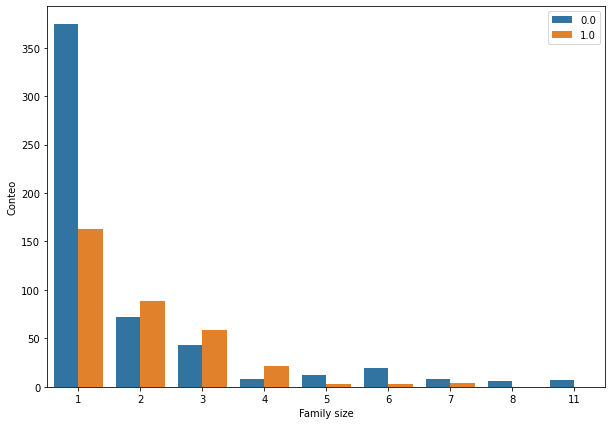

In [16]:
# algunos graficos descriptivos
plt.figure(figsize=(10,7))
sns.barplot(y="F", x="Fsize", data=tr,hue='Survived', orient='v')
plt.xlabel('Family size')
plt.ylabel('Conteo')
plt.legend(loc='upper right')

Podemos ver que hay una penalización de supervivencia para los hijos únicos y aquellos con familias de más de 4. Podemos colapsar esta variable en tres niveles que serán útiles ya que hay comparativamente menos familias numerosas. Vamos a crear una variable de tamaño de familia discretizada.

In [17]:
full['Fsize'].unique()

array(['2', '1', '5', '3', '7', '6', '4', '8', '11'], dtype=object)

In [18]:
# Discretizar la variable family size
full['Fsize']=full['Fsize'].astype('int')
full['FsizeD']=np.where(full.Fsize ==1, 'singleton',# aqui viene el else
         np.where(((full.Fsize <5) & (full.Fsize >1)),'small','large'))
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton


(<Figure size 432x288 with 3 Axes>,
 {('large', 'No'): (0.0, 0.0, 0.06889577846673556, 0.8359232665309184),
  ('large', 'Si'): (0.0,
   0.839245525667131,
   0.06889577846673556,
   0.16075447433286888),
  ('singleton', 'No'): (0.07384627351624051,
   0.0,
   0.5967263393005967,
   0.6941479982924702),
  ('singleton', 'Si'): (0.07384627351624051,
   0.6974702574286827,
   0.5967263393005967,
   0.30252974257131715),
  ('small', 'No'): (0.6755231078663423,
   0.0,
   0.32447689213365777,
   0.4198334319391981),
  ('small', 'Si'): (0.6755231078663423,
   0.42315569107541073,
   0.32447689213365777,
   0.5768443089245892)})

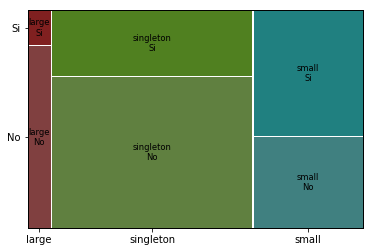

In [19]:
# Crear el mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
ts=pd.crosstab(full.FsizeD, full.Survived)
ts.columns=['No','Si']
ts=ts.reset_index()
ts1=pd.melt(ts,id_vars=['FsizeD'])
G = ts1.groupby(["FsizeD", "variable"]).sum()
mosaic(G["value"])

La trama de mosaico muestra que preservamos nuestra regla de que hay una penalización de supervivencia entre los solteros y las familias numerosas, pero un beneficio para los pasajeros de familias pequeñas. Podemos hacer algo más con nuestra variable de edad, pero faltan valores de edad en 263 filas

## Tratar algunas otras variables

In [20]:
# Esta variable tiene muchos nulos
full.Cabin[1:28]

1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
Name: Cabin, dtype: object

Extraigamos las primeras letras de la columna Cabin que representa el Deck

In [21]:
full['Deck']=full['Cabin'].astype(str).str[0]
full['Deck']=full.Deck.str.upper()
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,N
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,N
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,N


In [22]:
full.Deck.value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

# Problema de nulos

Ahora estamos listos para comenzar a explorar los datos faltantes y rectificarlos a través de la imputación. Hay varias maneras diferentes en las que podríamos hacer esto. 

Dado el pequeño tamaño del conjunto de datos, probablemente no deberíamos optar por eliminar observaciones completas (filas) o variables (columnas) que contengan valores faltantes. 

Nos queda la opción de reemplazar los valores faltantes con valores sensibles dada la distribución de los datos, por ejemplo, la media, la mediana o la moda. Finalmente, podríamos ir con la predicción. Usaremos los dos últimos métodos y confiaré en alguna visualización de datos para guiar nuestras decisiones.

## Imputacion sensible

In [23]:
full.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
Surname         object
Fsize            int32
Family          object
FsizeD          object
Deck            object
dtype: object

In [24]:
full.Embarked.isnull().sum()

2

In [25]:
 # Pasajeros 62 y 830 no tienen datos
 full[(full.PassengerId == 62) | (full.PassengerId == 830)]['Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [26]:
# elimiar los ids de pasajeros
embark_fare = full[(full.PassengerId !=62)|(full.PassengerId !=830)]
embark_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,N
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,N
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,Spector,1,Spector_1,singleton,N
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare Title,Oliva y Ocana,1,Oliva y Ocana_1,singleton,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Saether,1,Saether_1,singleton,N
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,Ware,1,Ware_1,singleton,N


Inferiremos sus valores para el embarque en base a los datos actuales que imaginamos pueden ser relevantes: clase de pasajero y tarifa. Vemos que pagaron $80 y $NA respectivamente y sus clases son 1 y NA. Entonces, ¿de dónde se embarcaron?

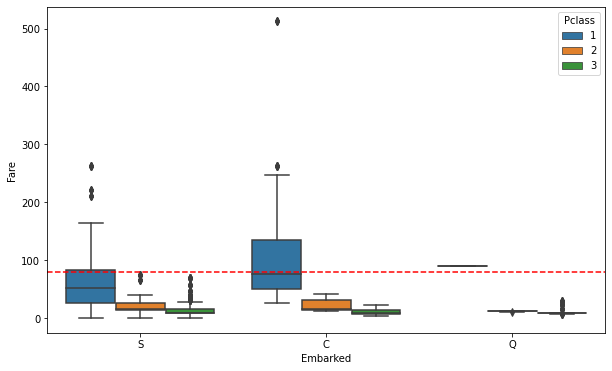

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Embarked',y= 'Fare',hue='Pclass',data= embark_fare)
plt.axhline(y = 80, color = 'r', linestyle = '--')

¡Voila! La tarifa mediana para un pasajero de primera clase que sale de Charbourg ("C") coincide muy bien con los $80 que pagan nuestros pasajeros con problemas de embarque. Creo que podemos reemplazar con seguridad los valores NA con 'C'.

In [25]:
# Dado que su tarifa era de $ 80 por primera clase, lo más probable es que se embarcaran desde 'C' 
full.loc[full.PassengerId == 62, 'Embarked']= 'C'
full.loc[full.PassengerId == 380, 'Embarked']= 'C'
full.Embarked.value_counts() # Verificamos 

S    913
C    272
Q    123
Name: Embarked, dtype: int64

Estamos cerca de arreglar el puñado de valores de NA aquí y allá. El pasajero de la fila 1043 tiene un valor de tarifa NA.

In [26]:
full.iloc[1043,:]

PassengerId                  1044
Survived                      NaN
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Title                          Mr
Surname                    Storey
Fsize                           1
Family                   Storey_1
FsizeD                  singleton
Deck                            N
Name: 152, dtype: object

Este es un pasajero de tercera clase que partió de Southampton ('S'). Visualicemos las tarifas entre todos los demás compartiendo su clase y embarque (n = 494).

In [27]:
full[(full.Pclass ==3)& (full.Embarked == 'S')]['Fare'].median()

8.05

<ipython-input-28-c0bef8797678>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full[(full.Pclass ==3)& (full.Embarked == 'S')]['Fare'],kde=True,hist=False)


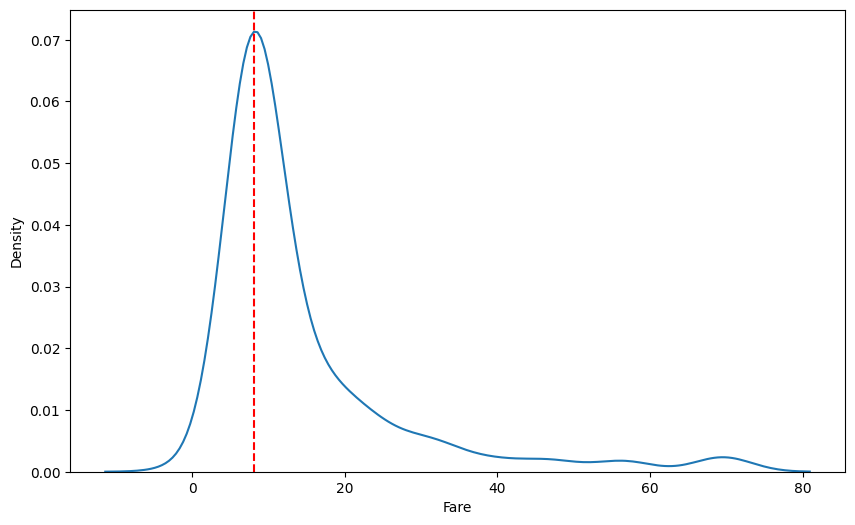

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(full[(full.Pclass ==3)& (full.Embarked == 'S')]['Fare'],kde=True,hist=False)
plt.axvline(x = full[(full.Pclass ==3)& (full.Embarked == 'S')]['Fare'].median(), color = 'r', linestyle = '--')

A partir de esta visualización, parece bastante razonable reemplazar el valor de la tarifa NA con una mediana para su clase y embarque, que es de $8,05.

In [29]:
 full.iloc[1043,:]

PassengerId                  1044
Survived                      NaN
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Title                          Mr
Surname                    Storey
Fsize                           1
Family                   Storey_1
FsizeD                  singleton
Deck                            N
Name: 152, dtype: object

In [30]:
full.loc[full.PassengerId == 1044, 'Fare']= full[(full.Pclass ==3)& (full.Embarked == 'S')]['Fare'].median()
full.iloc[1043,:]

PassengerId                  1044
Survived                      NaN
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                         8.05
Cabin                         NaN
Embarked                        S
Title                          Mr
Surname                    Storey
Fsize                           1
Family                   Storey_1
FsizeD                  singleton
Deck                            N
Name: 152, dtype: object

## Imputacion predictiva

Finalmente, como señalamos anteriormente, faltan bastantes valores de Edad en nuestros datos. Vamos a ser un poco más sofisticados en la imputación de valores de edad faltantes. ¿Por qué? Porque podemos. Crearemos un modelo que prediga las edades en función de otras variables.

In [31]:
sum(full.Age.isna())

263

In [32]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=d6003b63dc1552fd436c83961a1c78b1300e90ffbf3e75bb59081f521311a163
  Stored in directory: /root/.cache/pip/wheels/f9/fc/6a/b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11352 sha256=acb13b6251e92b61f7333177649cdddd7e480937c07878b7911579c0fcbafa8d
  Stored in directory: /root/.cache/pip/wheels/88/c4/be/e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute


In [33]:
full.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
Surname         object
Fsize            int64
Family          object
FsizeD          object
Deck            object
dtype: object

In [34]:
from fancyimpute import IterativeImputer
mice_impute = IterativeImputer()
traindatafill = mice_impute.fit_transform(full[['Age','SibSp','Fare','Survived']])
traindatafill= pd.DataFrame(traindatafill)

In [35]:
traindatafill[3].isnull().sum()

0

Text(0.5, 1.0, 'Modificacion MICE Age')

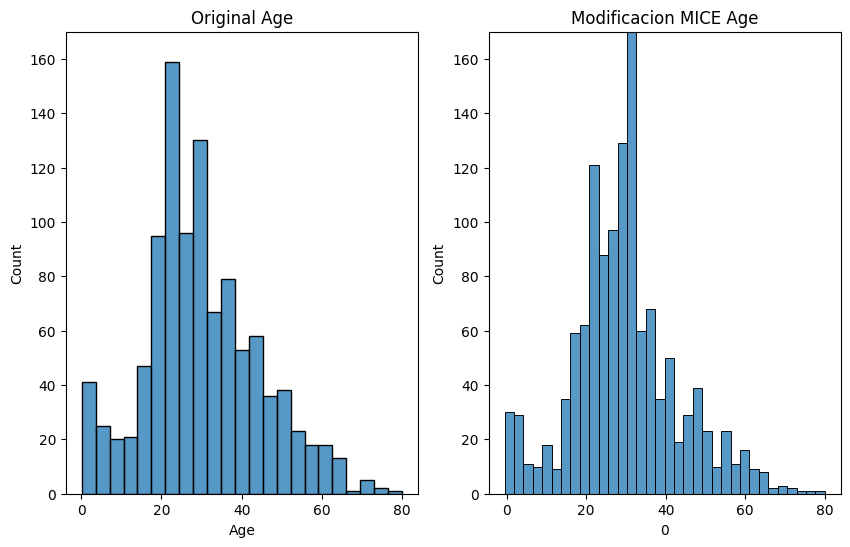

In [36]:
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(full.Age)
plt.ylim([0,170])
plt.title('Original Age')
plt.subplot(122)
sns.histplot(traindatafill[0])
plt.ylim([0,170])
plt.title('Modificacion MICE Age')

In [37]:
# Reasignacion
full['Age']= traindatafill[0] 
full['Survived']= traindatafill[3] 
print(full.Age.isnull().sum())
print(full.Survived.isnull().sum())

0
0


## Feature Engineering Parte II

Ahora que sabemos la edad de todos, podemos crear un par de nuevas variables dependientes de la edad: 'Child' y 'Mother'. Un niño será simplemente alguien menor de 18 años y una madre es un pasajero que es 1) mujer, 2) tiene más de 18 años, 3) tiene más de 0 hijos (¡no es broma!), y 4) no tiene el título 'Miss'.

In [38]:
full['Survived']=full['Survived'].astype('str')
full.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
Surname         object
Fsize            int64
Family          object
FsizeD          object
Deck            object
dtype: object

In [39]:
df_male= full.loc[full.Sex == 'male']
df_male.reset_index()
df_female= full.loc[full.Sex == 'female']
df_female.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck
0,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C
1,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,N
2,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C
3,8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs,Johnson,3,Johnson_3,small,N
4,9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs,Nasser,2,Nasser_2,small,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,409,1301,0.0,3,"Peacock, Miss. Treasteall",female,20.235103,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,Miss,Peacock,3,Peacock_3,small,N
462,410,1302,0.0,3,"Naughton, Miss. Hannah",female,32.368066,0,0,365237,7.7500,NaN,Q,Miss,Naughton,1,Naughton_1,singleton,N
463,411,1303,0.0,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,32.295987,1,0,19928,90.0000,C78,Q,Mrs,Minahan,2,Minahan_2,small,C
464,412,1304,1.0,3,"Henriksson, Miss. Jenny Lovisa",female,33.000000,0,0,347086,7.7750,NaN,S,Miss,Henriksson,1,Henriksson_1,singleton,N


(0.0, 100.0)

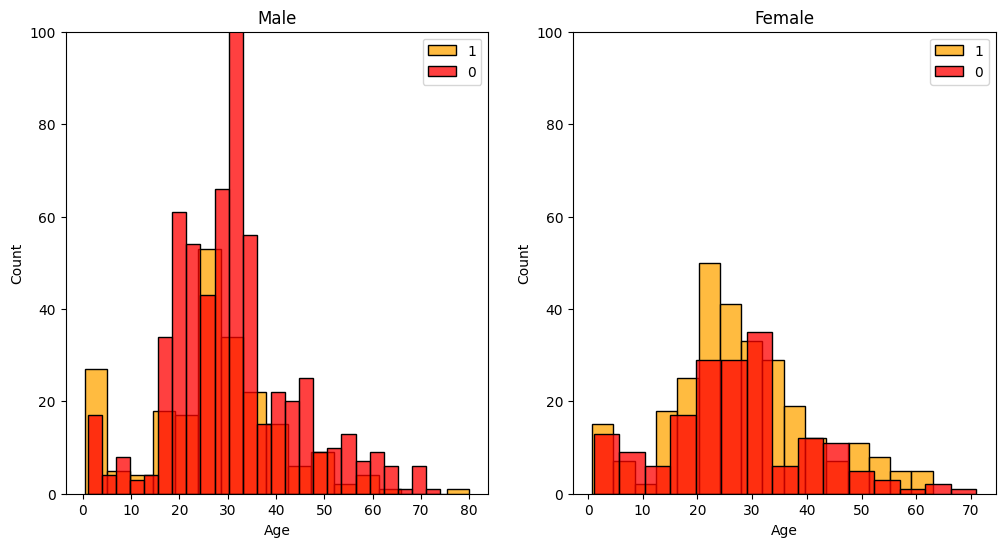

In [40]:
# Ahora miremos la relacion edad vs survival
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.histplot(df_male.loc[df_male['Survived']=='1.0']['Age'], color='orange',label='1')
sns.histplot(df_male.loc[df_male['Survived']=='0.0']['Age'],color='red',label='0')
plt.legend()
plt.title('Male')
plt.ylim([0,100])
plt.subplot(122)
sns.histplot(df_female.loc[df_female['Survived']=='1.0']['Age'], color='orange',label='1')
sns.histplot(df_female.loc[df_female['Survived']=='0.0']['Age'],color='red',label='0')
plt.legend()
plt.title('Female')
plt.ylim([0,100])

In [41]:
# Crear la columna child
full['Child']= np.where(full['Age']<18, 'Child','Adult')
# mostrar conteos
pd.crosstab(full.Child, full.Survived)

Survived,0.0,1.0
Child,,
Adult,714,415
Child,90,90


Parece que ser un niño no duele, ¡pero tampoco necesariamente te salvará! Terminaremos nuestra ingeniería de características creando la variable Madre. Tal vez podamos esperar que las madres tengan más probabilidades de haber sobrevivido en el Titanic.

In [42]:
# Creando la variable Mother
full['Mother'] = 'Not Mother'
full.loc[(full.Sex == 'female') & (full.Parch >0) & (full.Age >18) & (full.Title != 'Miss'), 'Mother']= 'Mother'
full.Mother.value_counts()

Not Mother    1231
Mother          78
Name: Mother, dtype: int64

In [43]:
pd.crosstab(full.Mother, full.Survived)

Survived,0.0,1.0
Mother,,
Mother,33,45
Not Mother,771,460


In [44]:
full.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          1
Title             0
Surname           0
Fsize             0
Family            0
FsizeD            0
Deck              0
Child             0
Mother            0
dtype: int64

In [45]:
full= full.drop(columns='Cabin')
full.dropna()
full.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       1
Title          0
Surname        0
Fsize          0
Family         0
FsizeD         0
Deck           0
Child          0
Mother         0
dtype: int64

# Prediccion

In [46]:
X=full[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','FsizeD','Child','Mother']]
y= full['Survived']

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
X=full[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','FsizeD','Child','Mother']]
y= full['Survived'].astype('str')

In [48]:
A=X[['Pclass','Age','SibSp','Parch','Fare']]
B=pd.get_dummies(X[['Sex','Embarked','Title','FsizeD','Child','Mother']])
X_new=pd.concat([A,B],axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [51]:
# Obtener predicciones
y_pred= clf.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       267
         1.0       0.69      0.58      0.63       165

    accuracy                           0.74       432
   macro avg       0.72      0.71      0.71       432
weighted avg       0.73      0.74      0.73       432



In [53]:
clf.feature_importances_

array([0.09985367, 0.08764557, 0.04983003, 0.01964413, 0.1008589 ,
       0.15419572, 0.11766094, 0.01818664, 0.00641462, 0.02050968,
       0.01440092, 0.02383615, 0.14245717, 0.06134339, 0.00428262,
       0.02346692, 0.0043631 , 0.01823211, 0.01080604, 0.0110123 ,
       0.00454172, 0.00645766])

In [54]:
len(clf.feature_importances_)

22

In [55]:
len(X_train.columns)

22

<BarContainer object of 22 artists>

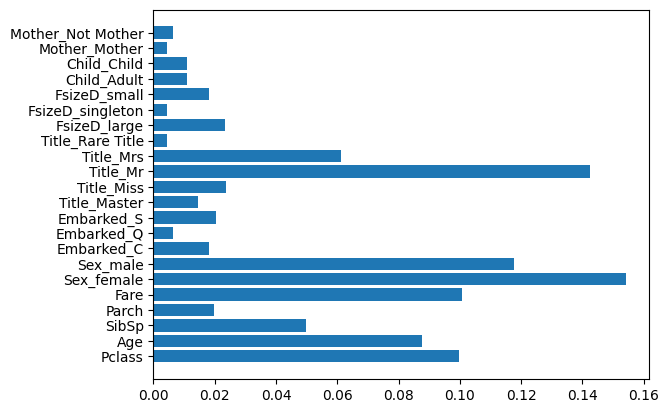

In [56]:
plt.barh(X_train.columns, clf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

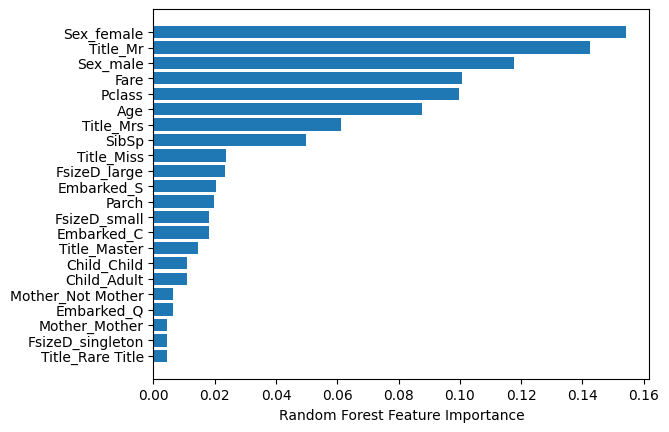

In [57]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")